In [5]:
import numpy as np # Pour la manipulation de tableaux
from keras.applications import  resnet50
from sklearn import metrics 
import os

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense, Conv2D # Pour instancier une couche dense
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2
import keras
from numpy.random import seed
import tensorflow

from keras.preprocessing.image import ImageDataGenerator
import itertools # Pour créer des iterateurs

from sklearn import linear_model, preprocessing 



%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input


In [24]:
#Paramètres
base_img_paths="/mnt/BigFast/VegaFastExtension/Rpackages/c3po_all/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/Backups/VegaFastExtension/Rpackages/c3po_all/c3po/Images_aquises/generateur_bigger.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.1
epochs=200
batch_size = 600
zoom_range = 1.25
horizontal_flip = True
Minimum_Number_Class=100
dropout_rate=0.5
#steps_per_epoch=len(data_train)//batch_size
steps_per_epoch=1
#validation_steps=len(data_test)//batch_size
validation_steps=1


In [25]:

df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)
for c in df:
    print(''+c+':',len(df[c].unique()))


class: 13
img_paths: 6220


In [26]:
All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)

Non_Utilisable=set(All_Unique)-set(Utilisable)

for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  

data_train.iloc[0][1]


'mnt/BigFast/VegaFastExtension/Rpackages/c3po_all/c3po/Images_aquises/Rec_images_bigger/image_2019-04-19_10-23-47_tracteur_3501.JPG'

In [27]:

for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    


In [28]:
seed(1)
tensorflow.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


Found 5369 validated image filenames belonging to 6 classes.
Found 597 validated image filenames belonging to 6 classes.


Epoch 1/200
8/8 [==============================] - 12s 2s/step - loss: 9.0428 - accuracy: 0.3371 - val_loss: 2.0752 - val_accuracy: 0.5913
Epoch 2/200
8/8 [==============================] - 9s 1s/step - loss: 2.1338 - accuracy: 0.3997 - val_loss: 1.4816 - val_accuracy: 0.5360
Epoch 3/200
8/8 [==============================] - 9s 1s/step - loss: 1.5515 - accuracy: 0.4718 - val_loss: 1.3574 - val_accuracy: 0.5360
Epoch 4/200
8/8 [==============================] - 9s 1s/step - loss: 1.4374 - accuracy: 0.5290 - val_loss: 1.3439 - val_accuracy: 0.5494
Epoch 5/200
8/8 [==============================] - 9s 1s/step - loss: 1.3675 - accuracy: 0.5546 - val_loss: 1.2825 - val_accuracy: 0.5611
Epoch 6/200
8/8 [==============================] - 9s 1s/step - loss: 1.3165 - accuracy: 0.5704 - val_loss: 1.2300 - val_accuracy: 0.5863
Epoch 7/200
8/8 [==============================] - 9s 1s/step - loss: 1.2858 - accuracy: 0.5620 - val_loss: 1.1695 - val_accuracy: 0.6231
Epoch 8/200
8/8 [================

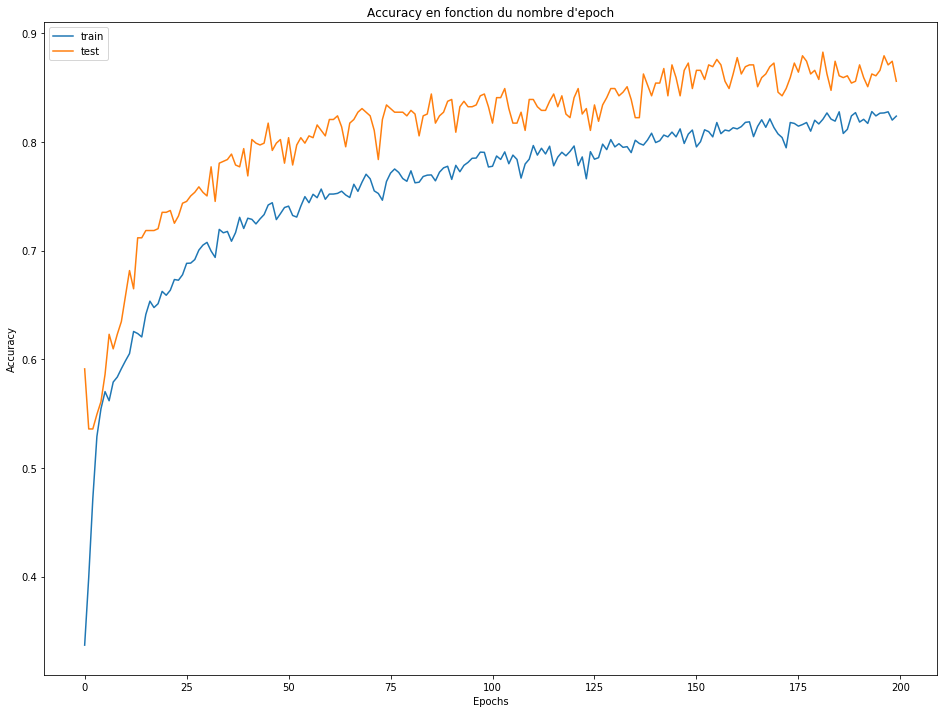

In [29]:
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation




history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
#lenet.save("drop_out.50")

In [2]:
tab_1=pd.read_csv("/mnt/BigFast/VegaFastExtension/Rpackages/c3po_all/c3po/Images_aquises/generateur_bigger.csv")
tab_2=pd.read_csv("/mnt/BigFast/VegaFastExtension/Rpackages/c3po_all/c3po/Images_aquises/imagettes_bigger.csv")


In [1]:
import pandas as pd

In [4]:
tab_1.shape

(6220, 3)

In [5]:
tab_2.shape

(6220, 11)